# Quantum Random Number Generator (QRNG)

Quantum Random Number Generator (QRNG) – Leveraging quantum mechanics for truly 
random outcomes, built with Qiskit. 

- In contrast, quantum mechanics introduces intrinsic unpredictability. When we measure a qubit 
in a superposition state, the result is truly random - governed by the Born rule, not by math 
tricks. That’s the foundation for our QRNG.

In [ ]:
!pip install qiskit qiskit-aer

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler

### Single-qubit H-method

Prepare a single qubit in `|0>` then apply `H` and measure. Each shot yields a random bit (0 or 1).

This is the simplest QRNG.

### Bell-pair / Entanglement method

This can be used in distributed scenarios or to create correlated randomness. 

Prepare a two-qubit Bell State and to show how we collect bits also.

### N-qubit parity (majority) method

Entangle multiple qubits and measure parity/XOR as output. Useful to amplify randomness and mitigate bias.


In [2]:
def quantum_rng(num_bits=8):
    """Now we generate a quantum random number with the given number of bits"""
    simulator = AerSimulator()
    sampler = StatevectorSampler()
    
    random_bits = ""
    for _ in range(num_bits):
        # Create a new circuit for each bit
        qrng_circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
        qrng_circuit.h(0)  # Put qubit in superposition
        qrng_circuit.measure(0, 0)  # Measure and collapse the state
        
        # Run the circuit directly with the simulator
        result = simulator.run(qrng_circuit, shots=1).result()
        counts = result.get_counts()
        bit = list(counts.keys())[0] 
        random_bits += bit
    
    random_number = int(random_bits, 2)  # Convert bits to integer
    return random_number, random_bits

#### Generates an 8-bit quantum random number

In [3]:
# This code generates an 8-bit quantum random number
random_number, bits = quantum_rng(8)
print(f"Quantum Random Number: {random_number} (Binary: {bits})")

Quantum Random Number: 186 (Binary: 10111010)


#### Generates an 2-bit quantum random number

In [10]:
# This code generates an 2-bit quantum random number
random_number, bits = quantum_rng(2)
print(f"Quantum Random Number: {random_number} (Binary: {bits})")

Quantum Random Number: 3 (Binary: 11)


#### Generates an 4-bit quantum random number

In [11]:
# This code generates an 4-bit quantum random number
random_number, bits = quantum_rng(4)
print(f"Quantum Random Number: {random_number} (Binary: {bits})")

Quantum Random Number: 15 (Binary: 1111)


In [12]:
qc = QuantumCircuit(1, 1)
qc.h(0) # Apply Hadamard gate
qc.measure(0, 0) # Measure qubit

In [13]:
from qiskit_aer import Aer

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts) # Random 0s and 1s

{'1': 532, '0': 492}


In [15]:
# Draw the circuit
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [16]:
from qiskit.visualization import *

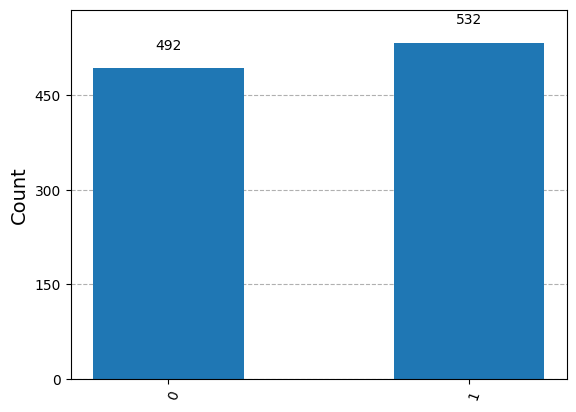

In [17]:
# Plot a histogram
plot_histogram(counts)

In [18]:
qc = QuantumCircuit(2, 2)
qc.h(0) # Apply Hadamard gate
qc.cx(0, 1) # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.measure([0,1], [0,1]) # Measure qubit

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts) 

{'11': 522, '00': 502}


In [20]:
# Draw the circuit
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

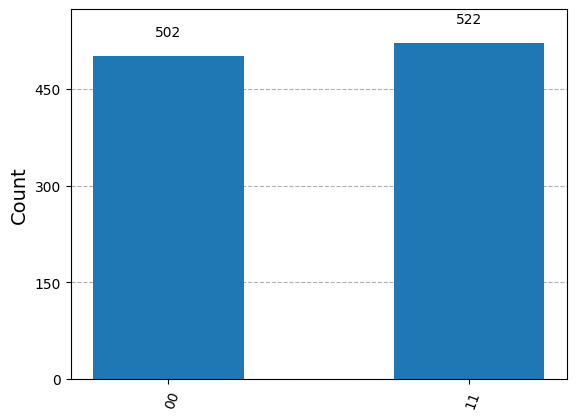

In [21]:
# Plot a histogram
plot_histogram(counts)